### Initial Data Probing

In [11]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./datasets/PriceRangeofHDBFlatsOffered.csv")

In [4]:
df.head()

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0
2,2008,Punggol,4-room,223000,327000,0,0
3,2008,Punggol,5-room,305000,428000,0,0
4,2008,Jurong West,3-room,142000,160000,0,0


In [5]:
df.columns

Index(['financial_year', 'town', 'room_type', 'min_selling_price',
       'max_selling_price', 'min_selling_price_less_ahg_shg',
       'max_selling_price_less_ahg_shg'],
      dtype='object')

So this data set is interesting. 

For each estate, it breaks it down by the room type, 2 room to 5-room. 

And then you have the min_selling_price

### Exploration objectives
- How many estates are there? 
- What is the most expensive estate for 4 room HDBs?
- What about 5? 
- What's the top 5 least expensive estates for 4 room HDBs?
- Create a column for average housing price that is the 50% mark between min and max price. 
- What's the housing price for 4-room HDBs in Bukit Batok across the years?

---

### How many estates are there?

In [10]:
df['town'].value_counts()

town
Punggol          47
Sengkang         39
Woodlands        35
Sembawang        31
Yishun           30
Choa Chu Kang    21
Jurong West      17
Bukit Panjang    17
Bukit Batok      16
Tengah           16
Hougang           4
Jurong East       4
Name: count, dtype: int64

In [19]:
len(np.array(df['town'].value_counts()))

12

There are only 12 towns in Singapore?? What the hell, didn't know that. Cannot be lah. These are the major towns I guess. 

What about the houses in central? Bukit Merah, Queenstown, etc? 

#### It does feel like this data set is not so complete. 

###

### What is the most expensive estate for 4 room HDBs?

In [26]:
# In order to find this out, we need to create a new column - avg_price 
# avg_price = (min_selling_price + max_selling_price) / 2
df['avg_price'] = (df['min_selling_price'] + df['max_selling_price']) / 2
df.head()

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg,avg_price
0,2008,Punggol,2-room,82000,107000,0,0,94500.0
1,2008,Punggol,3-room,135000,211000,0,0,173000.0
2,2008,Punggol,4-room,223000,327000,0,0,275000.0
3,2008,Punggol,5-room,305000,428000,0,0,366500.0
4,2008,Jurong West,3-room,142000,160000,0,0,151000.0


In [34]:
df = df[['financial_year', 'town', 'room_type', 'avg_price', 'min_selling_price',
       'max_selling_price', 'min_selling_price_less_ahg_shg',
       'max_selling_price_less_ahg_shg']]

In [38]:
fourRoom = df[df['room_type'] == '4-room']
fourRoom.head()

,financial_year,town,room_type,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
2,2008,Punggol,4-room,275000.0,223000,327000,0,0
5,2008,Jurong West,4-room,232000.0,211000,253000,0,0
9,2008,Bukit Panjang,4-room,240500.0,211000,270000,0,0
11,2008,Woodlands,4-room,220500.0,184000,257000,0,0
15,2008,Sengkang,4-room,232500.0,190000,275000,0,0


In [42]:
df2 = fourRoom.groupby('town').mean(numeric_only=True).sort_values(by='avg_price', ascending=False)
df2.head()

,financial_year,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
town,,,,,,
Hougang,2021.0,407500.0,308000.0,507000.0,248000.0,447000.0
Jurong East,2021.0,391500.0,347000.0,436000.0,287000.0,376000.0
Tengah,2019.5,335500.0,294750.0,376250.0,234750.0,316250.0
Punggol,2013.5,313500.0,264000.0,363000.0,193000.0,276000.0
Bukit Batok,2016.5,296750.0,262500.0,331000.0,210000.0,278500.0


In [49]:
mostExpensiveEstate4Room = df2[['avg_price', 'max_selling_price']]

In [50]:
mostExpensiveEstate4Room.head()

,avg_price,max_selling_price
town,,
Hougang,407500.0,507000.0
Jurong East,391500.0,436000.0
Tengah,335500.0,376250.0
Punggol,313500.0,363000.0
Bukit Batok,296750.0,331000.0


In [57]:
print("The most expensive estates for 4 room HDBs are:", ', '.join(mostExpensiveEstate4Room.head().index))

The most expensive estates for 4 room HDBs are: Hougang, Jurong East, Tengah, Punggol, Bukit Batok


### What are the most expensive estates for 5 room HDBs?

In [69]:
fiveRoom = df[df['room_type'] == '5-room']
fiveRoom

,financial_year,town,room_type,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
3,2008,Punggol,5-room,366500.0,305000,428000,0,0
6,2008,Jurong West,5-room,274000.0,229000,319000,0,0
12,2008,Woodlands,5-room,271500.0,247000,296000,0,0
16,2008,Sengkang,5-room,328500.0,290000,367000,0,0
20,2009,Punggol,5-room,370500.0,332000,409000,0,0
...,...,...,...,...,...,...,...,...
260,2021,Jurong East,5-room,0.0,0,0,0,0
264,2021,Jurong West,5-room,0.0,0,0,0,0
268,2021,Tengah,5-room,464500.0,404000,525000,359000,480000
272,2021,Woodlands,5-room,431500.0,372000,491000,327000,446000


In [70]:
mostExpensiveFiveRoom = fiveRoom.groupby('town').mean(numeric_only=True).sort_values(by='avg_price', ascending=False)[['avg_price', 'max_selling_price']]
mostExpensiveFiveRoom

,avg_price,max_selling_price
town,,
Tengah,451000.000000,501000.000000
Hougang,443500.000000,495000.000000
Punggol,410083.333333,470750.000000
Bukit Batok,401625.000000,439750.000000
Woodlands,353444.444444,395666.666667
Bukit Panjang,346833.333333,398000.000000
Sengkang,328950.000000,378500.000000
Yishun,320625.000000,355500.000000
Sembawang,256785.714286,279714.285714


In [72]:
print("The most expensive five room estates are:", ', '.join(mostExpensiveFiveRoom.head().index))

The most expensive five room estates are: Tengah, Hougang, Punggol, Bukit Batok, Woodlands


#### Observation 1:
Most expensive 4 room estates:

- Hougang, Jurong East, Tengah, Punggol, Bukit Batok

Most expensive 5 room estates: 

- Tengah, Hougang, Punggol, Bukit Batok, Woodlands. 

### What's the top 5 least expensive estates for 4 room HDBs?

In [75]:
fourRoom.groupby('town').mean(numeric_only=True).sort_values(by='avg_price')[['avg_price']].head()

,avg_price
town,
Bukit Panjang,256900.000000
Choa Chu Kang,269083.333333
Jurong West,272300.000000
Woodlands,273500.000000
Sembawang,275937.500000


### Longitudinal Analysis

### What's the housing price for 4-room HDBs in Bukit Batok across the years?

In [76]:
fourRoom.head()

,financial_year,town,room_type,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
2,2008,Punggol,4-room,275000.0,223000,327000,0,0
5,2008,Jurong West,4-room,232000.0,211000,253000,0,0
9,2008,Bukit Panjang,4-room,240500.0,211000,270000,0,0
11,2008,Woodlands,4-room,220500.0,184000,257000,0,0
15,2008,Sengkang,4-room,232500.0,190000,275000,0,0


In [77]:
fourRoom

,financial_year,town,room_type,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
2,2008,Punggol,4-room,275000.0,223000,327000,0,0
5,2008,Jurong West,4-room,232000.0,211000,253000,0,0
9,2008,Bukit Panjang,4-room,240500.0,211000,270000,0,0
11,2008,Woodlands,4-room,220500.0,184000,257000,0,0
15,2008,Sengkang,4-room,232500.0,190000,275000,0,0
...,...,...,...,...,...,...,...,...
259,2021,Jurong East,4-room,391500.0,347000,436000,287000,376000
263,2021,Jurong West,4-room,292500.0,264000,321000,204000,261000
267,2021,Tengah,4-room,351000.0,299000,403000,239000,343000
271,2021,Woodlands,4-room,324000.0,275000,373000,215000,313000


In [84]:
fourRoom[fourRoom['town'] == 'Bukit Batok']

,financial_year,town,room_type,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
115,2014,Bukit Batok,4-room,301500.0,259000,344000,224000,309000
139,2015,Bukit Batok,4-room,295500.0,266000,325000,211000,270000
171,2017,Bukit Batok,4-room,293000.0,265000,321000,205000,261000
235,2020,Bukit Batok,4-room,297000.0,260000,334000,200000,274000


Looks like the data for Bukit Batok is not so complete. 

The dataset should be until..

In [85]:
df

,financial_year,town,room_type,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,94500.0,82000,107000,0,0
1,2008,Punggol,3-room,173000.0,135000,211000,0,0
2,2008,Punggol,4-room,275000.0,223000,327000,0,0
3,2008,Punggol,5-room,366500.0,305000,428000,0,0
4,2008,Jurong West,3-room,151000.0,142000,160000,0,0
...,...,...,...,...,...,...,...,...
272,2021,Woodlands,5-room,431500.0,372000,491000,327000,446000
273,2021,Yishun,2-room,122000.0,95000,149000,15000,69000
274,2021,Yishun,3-room,214000.0,180000,248000,105000,173000
275,2021,Yishun,4-room,322000.0,270000,374000,210000,314000


It should be until 2021. 

For 4 room, Bukit Batok, I actually have only 4 entries. 

In [86]:
fourRoom[fourRoom['town'] == "Bukit Batok"]

,financial_year,town,room_type,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
115,2014,Bukit Batok,4-room,301500.0,259000,344000,224000,309000
139,2015,Bukit Batok,4-room,295500.0,266000,325000,211000,270000
171,2017,Bukit Batok,4-room,293000.0,265000,321000,205000,261000
235,2020,Bukit Batok,4-room,297000.0,260000,334000,200000,274000


In [88]:
import matplotlib.pyplot as plt
bb = fourRoom[fourRoom['town'] == "Bukit Batok"]

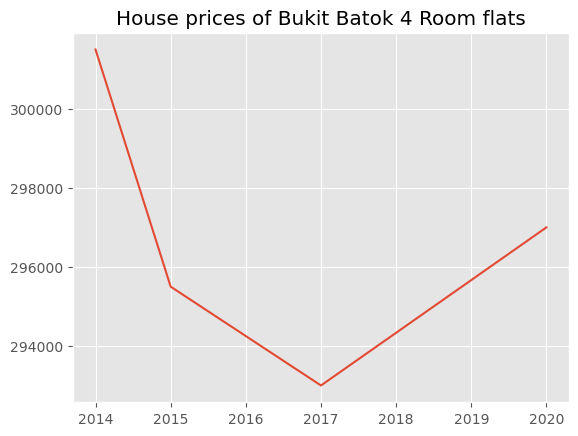

In [94]:
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.set_title("House prices of Bukit Batok 4 Room flats")
ax.plot(bb['financial_year'], bb['avg_price'])

Now I am curious how do the other estate compare in terms of price for the years. Let's plot all five most expensive estates side by side:

Hougang, Jurong East, Tengah, Punggol, Bukit Batok

### How do housing prices vary across the year by estate:

In [95]:
fourRoom

,financial_year,town,room_type,avg_price,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
2,2008,Punggol,4-room,275000.0,223000,327000,0,0
5,2008,Jurong West,4-room,232000.0,211000,253000,0,0
9,2008,Bukit Panjang,4-room,240500.0,211000,270000,0,0
11,2008,Woodlands,4-room,220500.0,184000,257000,0,0
15,2008,Sengkang,4-room,232500.0,190000,275000,0,0
...,...,...,...,...,...,...,...,...
259,2021,Jurong East,4-room,391500.0,347000,436000,287000,376000
263,2021,Jurong West,4-room,292500.0,264000,321000,204000,261000
267,2021,Tengah,4-room,351000.0,299000,403000,239000,343000
271,2021,Woodlands,4-room,324000.0,275000,373000,215000,313000


In [116]:
towns = mostExpensiveEstate4Room.head().index
towns


Index(['Hougang', 'Jurong East', 'Tengah', 'Punggol', 'Bukit Batok'], dtype='object', name='town')

In [128]:
# I'll need to construct a towns array where each item is a df of the yearly price of flat by town

# So I'll first iterate through towns
townsDf = []
for town in towns:
    temp_df = fourRoom[fourRoom['town'] == town]
    townsDf.append(temp_df)
townsDf[0][0]
# fourRoom[fourRoom['town'] == "Punggol"]

255    2021
Name: financial_year, dtype: int64

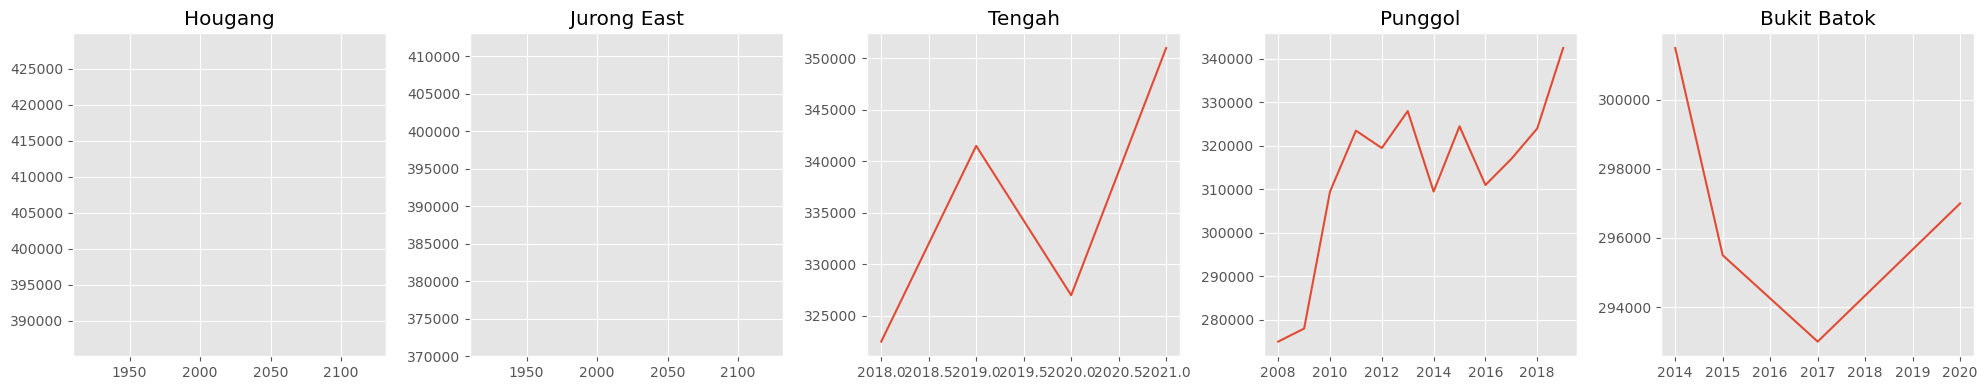

In [131]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    ax.plot(townsDf[i]['financial_year'], townsDf[i]['avg_price'])
    ax.set_title(towns[i])
plt.tight_layout()
plt.show()


Seems like there's no values for Hougang and Jurong East because it's a single value for x. I'll need to handle that with a scatter plot:

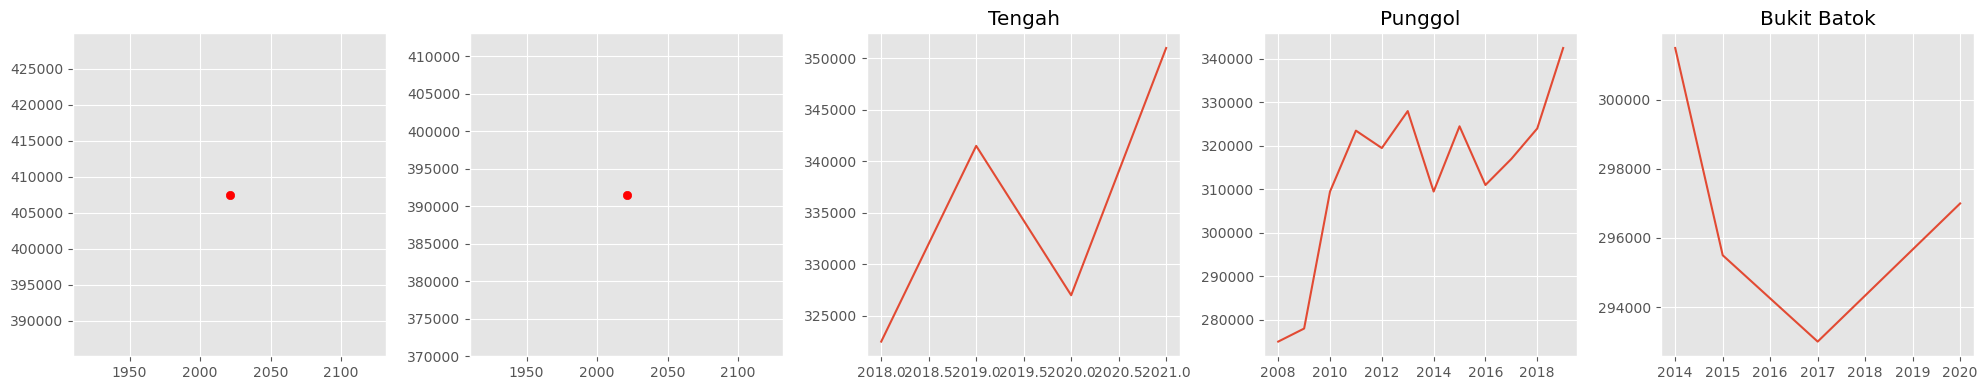

In [130]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    if len(townsDf[i]) == 1:
        ax.scatter(townsDf[i]['financial_year'], townsDf[i]['avg_price'], color='red')
    else:
        ax.plot(townsDf[i]['financial_year'], townsDf[i]['avg_price'])
        ax.set_title(towns[i])
plt.tight_layout()
plt.show()

#### Observations on house prices of different estates throughout the years:
We need to scale down the data to the same scale actually. If you just look at 2018 onwards, there's upward trends for all the neighbourhoods. 

Are the house price changes correlated across all neighbourhoods? 